In [1]:
import pickle #read pickle file
import coffea
from coffea import hist
import topcoffea.modules.HistEFT as HistEFT
import topcoffea.modules.eft_helper as efth
import gzip #read zipped pickle file
import matplotlib.pyplot as plt #plot histograms
from matplotlib.backends.backend_pdf import PdfPages
import topcoffea.modules.utils as utils
import mplhep as hep

import numpy as np

import ttbarEFT.modules.plotting_tools as pt

/afs/crc.nd.edu/user/h/hnelson2/miniconda3/envs/ttbarEFT-env/lib/python3.9/site-packages/coffea/util.py:154: FutureWarning: In coffea version v2023.3.0 (target date: 31 Mar 2023), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


In [2]:
hep.style.use("CMS")
params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
          'legend.fontsize':20}
plt.rcParams.update(params)

In [6]:
fin_mc = "test_mc.pkl.gz"
hists_mc = utils.get_hist_from_pkl(fin_mc, allow_empty=False)
print(hists_mc)

fin_central = "test_TTJetsNDskim.pkl.gz"
hists_central = utils.get_hist_from_pkl(fin_central, allow_empty=False)
print(hists_central)

{'njets': <HistEFT (sample,njets) instance at 0x7fa06c8f4bb0>}
{'njets': <HistEFT (sample,njets) instance at 0x7fa06c8f4910>}


TypeError: unsupported operand type(s) for /: 'tuple' and 'tuple'

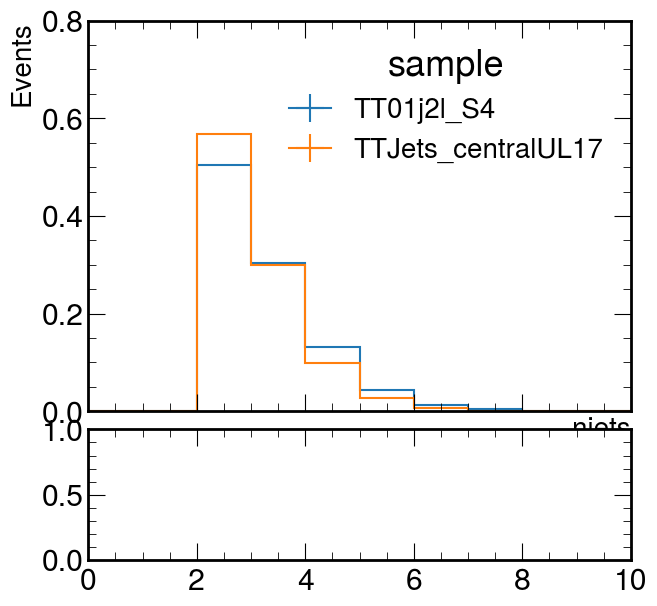

In [47]:
fig, (ax, rax) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(7,7),
    gridspec_kw={"height_ratios": (3, 1)},
    sharex=True
)
fig.subplots_adjust(hspace=.07)

ax.set_ylim([0,0.8])

hist.plot1d(
    hists_mc['njets'],
    ax=ax,
    stack=False,
    clear=False
)
hist.plot1d(
    hists_central['njets'],
    ax=ax, 
    stack=False,
    clear=False,
)

# rax.set_ylim([-1,1])
# hist.plotratio(
#     num = hists_central['njets'].sum("sample"),
#     denom = hists_mc['njets'].sum("sample"),
#     ax=rax,
#     unc = 'num',
#     error_opts = {},
#     denom_fill_opts = {},
#     guide_opts = {ax.set_ylim:[0,2]}
# )

num = hists_central['njets'].sum("sample")
denom = hists_mc['njets'].sum("sample")
sumw_num = num.values(sumw2=True)[()]
sumw_denom = denom.values(sumw2=True)[()]
rsumw = sumw_num / sumw_denom
# rax.errorbar()

# print(hists_mc['njets'].values())
# print(hists_central['njets'].values())

In [ ]:
# print(hists["njets"].values())
pt.make_single_histo(hists, "njets", "all_njets")

In [3]:
fin = "all_central_EFT.pkl.gz"
hists = utils.get_hist_from_pkl(fin, allow_empty=False)
print(hists)

{'njets': <HistEFT (sample,njets) instance at 0x7fa7fc17e220>}


{('TT01j2l_S4',): array([0.        , 0.        , 0.50510614, 0.30298966, 0.13177848,
       0.04344176, 0.01196029, 0.00385569, 0.00059363, 0.        ]), ('TTToDilep_mg',): array([0.00000000e+00, 0.00000000e+00, 5.86734137e-01, 2.88568486e-01,
       9.35590087e-02, 2.40977230e-02, 5.56101299e-03, 1.19193922e-03,
       2.26057439e-04, 4.52114878e-05]), ('TTJets_Dilep_mgMLM',): array([0.00000000e+00, 0.00000000e+00, 5.51261907e-01, 2.89685710e-01,
       1.09831992e-01, 3.51612133e-02, 1.03004343e-02, 2.85664590e-03,
       7.04580362e-04, 1.47401749e-04]), ('TTTo2L2Nu_powheg',): array([0.00000000e+00, 0.00000000e+00, 5.60703116e-01, 2.86982497e-01,
       1.07491485e-01, 3.31161552e-02, 8.98633893e-03, 2.12643439e-03,
       4.57931500e-04, 1.08815406e-04]), ('TTJets_centralUL17',): array([0.00000000e+00, 0.00000000e+00, 5.67617128e-01, 2.99030659e-01,
       9.90205042e-02, 2.63060802e-02, 6.24344515e-03, 1.39983555e-03,
       2.91353331e-04, 7.20011107e-05])}
figure saved to:  njet

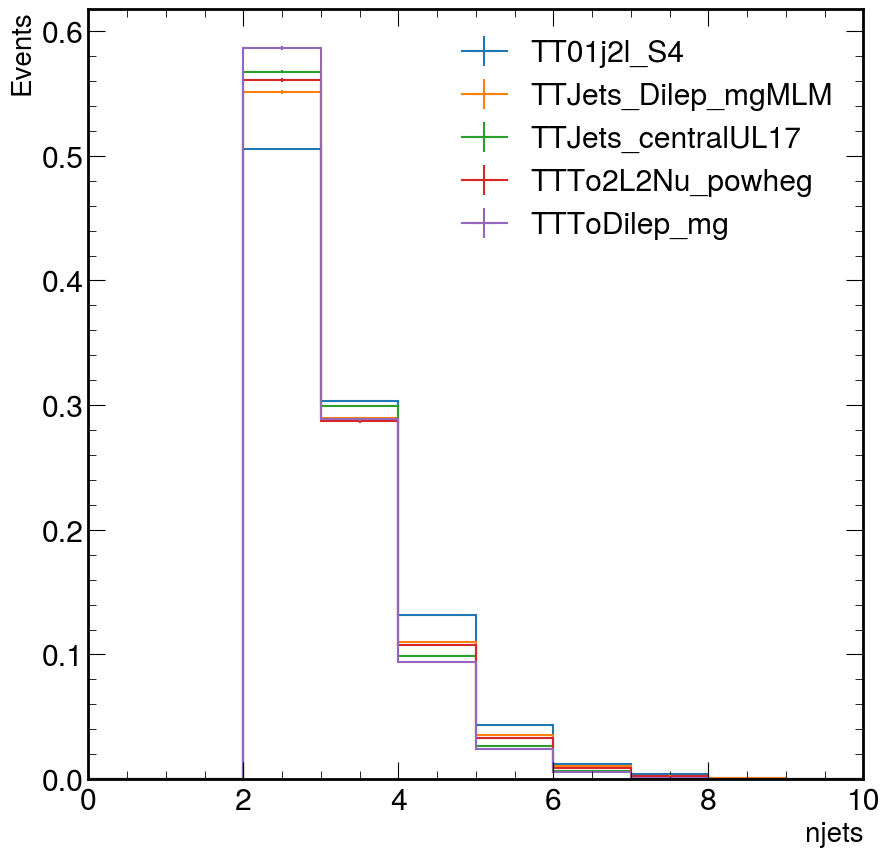

In [4]:
print(hists["njets"].values())
pt.make_sm_histo(hists, "njets", "njets")

In [ ]:
# fin = "TT01j2l_S4v8.pkl.gz"
fin = "central_TT01j2l_S4v8.pkl.gz"
hists = utils.get_hist_from_pkl(fin, allow_empty=False)
print(hists)

In [ ]:
hists['njets'].identifiers('sample')

In [ ]:
# for name in hists:
#     h = hists[name]
#     h.set_sm()
#     fig, ax = plt.subplots(1,1) #create an axis for plotting
#     hist.plot1d(h, ax=ax, stack=False)
#     ax.legend(loc = 'upper right', fontsize = 'medium')
#     fig.show()


h = hists["mll"]
h.set_sm()
print(h._wcs)
# print(h.values())
fig, ax = plt.subplots(1,1) #create an axis for plotting
hist.plot1d(h, ax=ax, stack=False)
# ax.autoscale(axis='y')
ax.legend(loc = 'upper right', fontsize = 'small')
fig.show()  

In [ ]:
pt.save_sm_histo(hists, 'mll', 'TT01j2l_S4')

In [ ]:
fin = "TT01j2l_S4v8_djr.pkl.gz"
hists = utils.get_hist_from_pkl(fin, allow_empty=False)
print(hists)

In [ ]:
h = hists['djr_10_all']
h0 = hists['djr_10_0p']
h1 = hists['djr_10_1p']
fig, ax = plt.subplots(1,1)
ax.set_yscale('log')
h.set_sm()
h0.set_sm()
h1.set_sm()
hist.plot1d(h, stack=False)
hist.plot1d(h0, stack=False)
hist.plot1d(h1, stack=False)
ax.set_xlabel(r"DJR 0 $\rightarrow$ 1")
# ax.set_yscale('log')
ax.legend(["Total", "0 partons", "1 parton"])

In [ ]:
pt.save_djr01_plot(hists, "TT01j2l_S4")

In [ ]:
fin = "TT01j2l_S4v8_weights.pkl.gz"
hists = utils.get_hist_from_pkl(fin, allow_empty=False)
print(hists)

In [ ]:
h = hists['weights_SM_log']
fig, ax = plt.subplots(1,1)
h.set_sm()
hist.plot1d(h, ax=ax, stack=False)
fig.suptitle("Event Weights at the SM", fontsize = 'small')
ax.legend(loc='upper left')

In [ ]:
pt.save_single_histo(hists, 'weights_SM_log', 'TT01j2l_S4', title='Event weights at SM', loc='upper left')

In [ ]:
h = hists['weights_pt2_log']
fig, ax = plt.subplots(1,1)
h.set_sm()
hist.plot1d(h, ax=ax, stack=False)
fig.suptitle("Event weights at point 2", fontsize = 'small')
ax.legend(loc='upper left')

In [ ]:
h = hists['weights_pt4_log']
fig, ax = plt.subplots(1,1)
h.set_sm()
hist.plot1d(h, ax=ax, stack=False)
fig.suptitle("Event weights at point 3", fontsize = 'small')
ax.legend(loc='upper left')